## 데이터 다운 및 환경설정

Google colab 기반으로 데이터 파일들을 불러오고 저장하기 위해서 Google Drive를 연결함.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


다른 프로그램 설치를 위해 bioconda 설치.

In [ ]:
!git clone https://github.com/hyeshik/colab-biolab.git
!cd colab-biolab && bash tools/setup.sh
exec(open('colab-biolab/tools/activate_conda.py').read())

Cloning into 'colab-biolab'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 69 (delta 22), reused 54 (delta 13), pack-reused 0
Unpacking objects: 100% (69/69), done.
./
./root/
./root/.bin.priority/
./root/.bin.priority/pip
./root/.bin.priority/pip3
./root/.bin.priority/pip2
./root/.vimrc
./root/.profile
./root/.condarc
./root/.tmux.conf
./root/.bashrc.biolab
--2022-05-02 22:07:42--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75660608 (72M) [application/x-sh]
Saving to: ‘miniconda3.sh’

miniconda3.sh       100%[===================>]  72.16M  91.8MB/s    in 0.8s    

2022-05-02 22:07:43 (91.8 MB/s) - ‘miniconda3.sh’ sav

필요한 시퀀싱 데이터 (binfo1-datapack1.tar)를 다운로드 받고 /content/drive/MyDrive/ 위치에 압축 해제.

In [ ]:
!wget -O - --no-check-certificate https://hyeshik.qbio.io/binfo/binfo1-datapack1.tar | tar -C /content/drive/MyDrive -xf -

각 파일들의 원래 체크섬:

```
140aaf30bcb9276cc716f8699f04ddd6  CLIP-35L33G.bam
f1b3336ed7e2f97d562dcc71641251bd  CLIP-35L33G.bam.bai
328883a73d507eafbf5b60bd6b906201  RNA-control.bam
02073818e2f398a73c3b76e5169de1ca  RNA-control.bam.bai
b09550d09d6c2a4ce27f0226f426fdb1  RNA-siLin28a.bam
fef112c727244060ea62d3f2564a07f6  RNA-siLin28a.bam.bai
28bbd0c47d725669340c784f1b772c01  RNA-siLuc.bam
43590fdc4d81905c0432e0d1cb8cfd5b  RNA-siLuc.bam.bai
5c08a9297307bc83259e658c4474f0cc  RPF-siLin28a.bam
a1bb3e29be412dfd7fd8d16b1b1acc4c  RPF-siLin28a.bam.bai
f2eebf50943024d0116c9cd3e744c707  RPF-siLuc.bam
dc24f69e8f571fc8be30f28ce5b84fcd  RPF-siLuc.bam.bai
```

위 체크섬과 받은 MD5 체크섬이 같은지 확인.

In [ ]:
cd content
!md5sum /content/drive/MyDrive/binfo1-datapack1/*

140aaf30bcb9276cc716f8699f04ddd6  /content/drive/MyDrive/binfo1-datapack1/CLIP-35L33G.bam
f1b3336ed7e2f97d562dcc71641251bd  /content/drive/MyDrive/binfo1-datapack1/CLIP-35L33G.bam.bai
328883a73d507eafbf5b60bd6b906201  /content/drive/MyDrive/binfo1-datapack1/RNA-control.bam
02073818e2f398a73c3b76e5169de1ca  /content/drive/MyDrive/binfo1-datapack1/RNA-control.bam.bai
b09550d09d6c2a4ce27f0226f426fdb1  /content/drive/MyDrive/binfo1-datapack1/RNA-siLin28a.bam
fef112c727244060ea62d3f2564a07f6  /content/drive/MyDrive/binfo1-datapack1/RNA-siLin28a.bam.bai
28bbd0c47d725669340c784f1b772c01  /content/drive/MyDrive/binfo1-datapack1/RNA-siLuc.bam
43590fdc4d81905c0432e0d1cb8cfd5b  /content/drive/MyDrive/binfo1-datapack1/RNA-siLuc.bam.bai
5c08a9297307bc83259e658c4474f0cc  /content/drive/MyDrive/binfo1-datapack1/RPF-siLin28a.bam
a1bb3e29be412dfd7fd8d16b1b1acc4c  /content/drive/MyDrive/binfo1-datapack1/RPF-siLin28a.bam.bai
f2eebf50943024d0116c9cd3e744c707  /content/drive/MyDrive/binfo1-datapack1/RPF-si

GENCODE Annotation 데이터 받고 gunzip으로 annotation 압축해제.

In [ ]:
!wget --no-check-certificate -O /content/drive/MyDrive/binfo1-datapack1/gencode.gtf.gz http://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_mouse/release_M27/gencode.vM27.annotation.gtf.gz

In [ ]:
!gunzip /content/drive/MyDrive/binfo1-datapack1/gencode.gtf.gz

실습에 필요한 프로그램들 몇 가지를 추가로 설치.

---



In [ ]:
!conda install -y subread

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done


==> WARNING: A newer version of conda exists. <==
  current version: 4.11.0
  latest version: 4.12.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /root/conda/envs/lab

  added / updated specs:
    - subread


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    subread-2.0.1              |       h7132678_2        22.9 MB  bioconda
    ------------------------------------------------------------
                                           Total:        22.9 MB

The following NEW packages will be INSTALLED:

  subread            bioconda/linux-64::subread-2.0.1-h7132678_2



subread-2.0.1        | 22.9 MB   | : 100% 1.0/1 [00:03<00:00,  3.87s/it]               
Preparing transaction: - done
Verify

alignment와 annotation 파일들을 이용해서 transcript별 read count 구함.
(multi-mapping 무시)

In [ ]:
%cd /content/drive/MyDrive/binfo1-datapack1/

/content/drive/MyDrive/binfo1-datapack1


In [ ]:
!featureCounts -a gencode.gtf -o read-counts.txt *.bam 


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.1

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 6 BAM files                                      ||
||                           o CLIP-35L33G.bam                                ||
||                           o RNA-control.bam                                ||
||                           o RNA-siLin28a.bam                               ||
||                           o RNA-siLuc.bam                     

결과를 pandas로 읽고 cnts로 받음.

In [ ]:
import pandas as pd
cnts = pd.read_csv('read-counts.txt', sep='\t', comment='#', index_col=0)
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0


clip_enrichment와 rden_chnage 계산하여 cnts에 column으로 넣고 확인.

In [ ]:
cnts['clip_enrichment'] = cnts['CLIP-35L33G.bam'] / cnts['RNA-control.bam']
cnts['rden_change'] = (cnts['RPF-siLin28a.bam'] / cnts['RNA-siLin28a.bam']) / (cnts['RPF-siLuc.bam'] / cnts['RNA-siLuc.bam'])
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
Geneid,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0,4.0,NaN
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,inf,NaN
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,NaN,NaN


cnts 이용하여 localization 정보 없는 그림 그려보기.

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


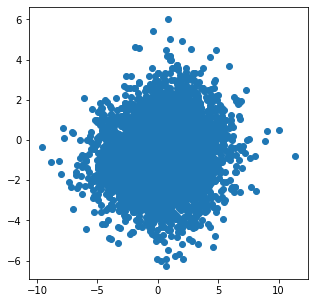

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(np.log2(cnts['clip_enrichment']),
           np.log2(cnts['rden_change']))

## Protein localization 반영하여 실제로 그림 그려보기

주어진 localization data(https://hyeshik.qbio.io/binfo/mouselocalization-20210507.txt)를 mouselocal로 받음.

(처음 돌릴 땐 오류 나서, 한 번 더 돌려야 제대로 받아짐)

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
mouselocal = pd.read_csv('https://hyeshik.qbio.io/binfo/mouselocalization-20210507.txt', sep='\t')
mouselocal.head()

,gene_id,Gene names,type
0,ENSMUSG00000000001,Gnai3,cytoplasm
1,ENSMUSG00000000028,Cdc45 Cdc45l Cdc45l2,nucleus
2,ENSMUSG00000000049,Apoh B2gp1,cytoplasm
3,ENSMUSG00000000058,Cav2,cytoplasm
4,ENSMUSG00000000085,Scmh1,nucleus


이 localization 데이터와 위의 transcript별 read count data를 합쳐서 scatter plot을 만들려고 함.

두 가지 문제가 있는데,
1. transcript별 read count data (=cnts)의 gene_id에 소수점이 붙어있어서 localization data (=mouselocal)와 일치시키기 어려움.
2. 두 데이터의 gene id 나타내는 column 이름이 다름 (하나는 Geneid, 다른 하나는 gene_id)

순서대로 해결해보기로 함.

##1. transcript별 read count data (=cnts)에서 Geneid 소수점 버리기
우선 transcript별 read count data를 cnts2로 새로 받고, 소수점(.)기준으로 나눠 소수점 앞의 값을 parts로 받음.

In [ ]:
import pandas as pd
cnts2 = pd.read_csv('read-counts.txt', sep='\t', comment='#', index_col=False)
cnts2.head()

,Geneid,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
0,ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0
1,ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0
2,ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0
3,ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0
4,ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0


In [ ]:
parts = cnts2['Geneid'].str.split('.').str[0]
parts.head()

0    ENSMUSG00000102693
1    ENSMUSG00000064842
2    ENSMUSG00000051951
3    ENSMUSG00000102851
4    ENSMUSG00000103377
Name: Geneid, dtype: object

소수점을 제거한 Geneid값 (=parts)을 cnts2의 Geneid 값으로 대체함.

In [ ]:
cnts2['Geneid'] = parts
cnts2.head()

,Geneid,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
0,ENSMUSG00000102693,chr1,3143476,3144545,+,1070,0,0,0,0,0,0
1,ENSMUSG00000064842,chr1,3172239,3172348,+,110,0,0,0,0,0,0
2,ENSMUSG00000051951,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0
3,ENSMUSG00000102851,chr1,3322980,3323459,+,480,3,0,0,0,0,0
4,ENSMUSG00000103377,chr1,3435954,3438772,-,2819,0,0,0,0,0,0


##2. 두 데이터의 geneid column 이름 일치시키기
transcript별 read count data (=cnts2)의 column 이름 변경.

In [ ]:
cnts2.rename(columns={"Geneid":"gene_id"},inplace=True)
cnts2.head()

,gene_id,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
0,ENSMUSG00000102693,chr1,3143476,3144545,+,1070,0,0,0,0,0,0
1,ENSMUSG00000064842,chr1,3172239,3172348,+,110,0,0,0,0,0,0
2,ENSMUSG00000051951,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0
3,ENSMUSG00000102851,chr1,3322980,3323459,+,480,3,0,0,0,0,0
4,ENSMUSG00000103377,chr1,3435954,3438772,-,2819,0,0,0,0,0,0


##3. Localization 데이터와 transcript별 read count data 합치기
pd.merge 명령어를 이용하여 gene_id column 기준으로 cm으로 받음.

Localization된 값만 받는 건 cm으로, localization data에 없는 데이터까지 포함하는 건 how='outer' 옵션을 이용하여 cm2로 받음.

In [ ]:
cm = pd.merge(cnts2,mouselocal,on='gene_id')

cm['clip_enrichment'] = cm['CLIP-35L33G.bam'] / cm['RNA-control.bam']
cm['rden_change'] = (cm['RPF-siLin28a.bam'] / cm['RNA-siLin28a.bam']) / (cm['RPF-siLuc.bam'] / cm['RNA-siLuc.bam'])
cm.head()

,gene_id,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,Gene names,type,clip_enrichment,rden_change
0,ENSMUSG00000051951,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0,Xkr4 Xrg4,integral membrane,4.000000,NaN
1,ENSMUSG00000025902,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4561154;4561473;4561613;4561936;4562680;456268...,4562891;4562886;4562891;4562891;4563827;456289...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,4772,6,1,8,5,2,3,Sox17 Sox-17,nucleus,6.000000,0.416667
2,ENSMUSG00000025903,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,574,1219,1236,33,44,Lypla1 Apt1 Pla1a,cytoplasm,3.562718,0.760459
3,ENSMUSG00000002459,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4979799;4979799;4980625;4980697;4982537;498253...,4980885;4980885;4980885;4980885;4982771;498277...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,4239,5,1,1,8,3,2,Rgs20 Rgsz1,nucleus,5.000000,12.000000
4,ENSMUSG00000025905,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,5658689;5658716;5658716;5658780;5659164;565922...,5661534;5658886;5658886;5658886;5659528;565952...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,9151,49,1,20,20,8,7,Oprk1,integral membrane,49.000000,1.142857


In [ ]:
cm2 = pd.merge(cnts2,mouselocal,how='outer',on='gene_id')

cm2['clip_enrichment'] = cm2['CLIP-35L33G.bam'] / cm2['RNA-control.bam']
cm2['rden_change'] = (cm2['RPF-siLin28a.bam'] / cm2['RNA-siLin28a.bam']) / (cm2['RPF-siLuc.bam'] / cm2['RNA-siLuc.bam'])
cm2.head()

,gene_id,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,Gene names,type,clip_enrichment,rden_change
0,ENSMUSG00000102693,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,NaN,NaN,NaN,NaN
1,ENSMUSG00000064842,chr1,3172239,3172348,+,110,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2,ENSMUSG00000051951,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0,Xkr4 Xrg4,integral membrane,4.0,NaN
3,ENSMUSG00000102851,chr1,3322980,3323459,+,480,3,0,0,0,0,0,NaN,NaN,inf,NaN
4,ENSMUSG00000103377,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,NaN,NaN,NaN,NaN


##4. Scatter plot 그리기
우선 cm을 이용하여 localization 된 값만 그려보고,

그 후 cm2를 이용하여 locolization되지 않은 값까지 포함해서 그려봄.

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


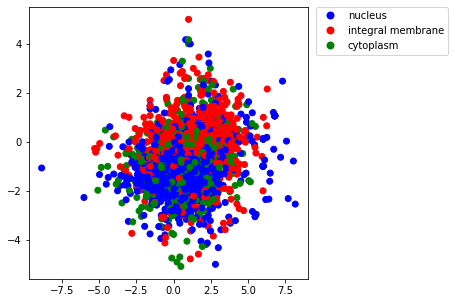

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd

df = pd.DataFrame(dict(clip_enrichment=np.log2(cm['clip_enrichment']), rden_change=np.log2(cm['rden_change']), type=cm['type']))

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

colors = {'nucleus':'blue', 'integral membrane':'red', 'cytoplasm':'green'}
ax.scatter(df['clip_enrichment'], df['rden_change'], c=df['type'].map(colors))

nucleus_color = Line2D(range(1), range(1), color="white", marker='o', markerfacecolor='blue',label='nucleus',markersize=9)
integral_membrane_color = Line2D(range(1), range(1), color="white", marker='o', markerfacecolor='red',label='integral membrane',markersize=9)
cytoplasm_color = Line2D(range(1), range(1), color="white", marker='o', markerfacecolor='green',label='cytoplasm',markersize=9)

ax.legend(handles=[nucleus_color,integral_membrane_color,cytoplasm_color],loc='upper right', bbox_to_anchor=(1.52, 1.02))

plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


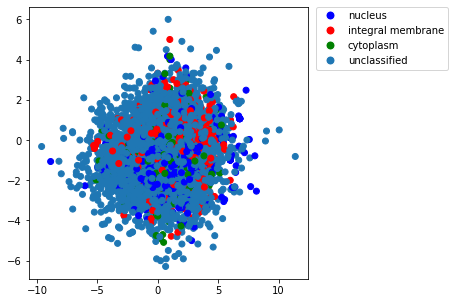

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd

df2 = pd.DataFrame(dict(clip_enrichment=np.log2(cm2['clip_enrichment']), rden_change=np.log2(cm2['rden_change']), type=cm2['type']))

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

colors2 = {'nucleus':'blue', 'integral membrane':'red', 'cytoplasm':'green', np.nan:'#1f77b4'}
ax.scatter(df2['clip_enrichment'], df2['rden_change'], c=df2['type'].map(colors2))

nucleus_color2 = Line2D(range(1), range(1), color="white", marker='o', markerfacecolor='blue',label='nucleus',markersize=9)
integral_membrane_color2 = Line2D(range(1), range(1), color="white", marker='o', markerfacecolor='red',label='integral membrane',markersize=9)
cytoplasm_color2 = Line2D(range(1), range(1), color="white", marker='o', markerfacecolor='green',label='cytoplasm',markersize=9)
unclassified2 = Line2D(range(1), range(1), color="white", marker='o', markerfacecolor='#1f77b4',label='unclassified',markersize=9)

ax.legend(handles=[nucleus_color2,integral_membrane_color2,cytoplasm_color2,unclassified2],loc='upper right', bbox_to_anchor=(1.52, 1.02))

plt.show()